In [49]:
%load_ext autoreload
%autoreload 2
import os
import yfinance as yf
import bls
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
spy_returns = yf.Ticker("SPY").history(auto_adjust=True)

In [41]:
employment = bls.get_series("CES0000000001",startyear="2000",endyear="2024")

<Axes: xlabel='date'>

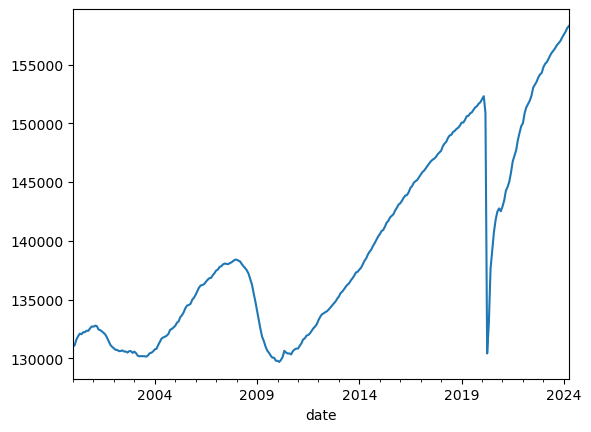

In [43]:
employment.plot()

In [44]:
cpi = bls.get_series("CUUR0000SA0",startyear="2000",endyear="2024")

In [52]:
economic_data = pd.concat([employment,cpi],axis=1)

In [54]:
economic_data["CES0000000001"] = economic_data["CES0000000001"].pct_change()

In [56]:
economic_data["CUUR0000SA0"]= economic_data["CUUR0000SA0"].pct_change(fill_method=None)